In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
keras.backend.set_image_data_format('channels_first')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import classification_report,confusion_matrix
import itertools

C:\Users\HP\anaconda3\envs\Reacon\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\anaconda3\envs\Reacon\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\HP\anaconda3\envs\Reacon\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
PATH = os.getcwd()
# Define data path
data_path = r"C:\Users\HP\Downloads\archive (1)\data"
data_dir_list = os.listdir(data_path)
data_dir_list

['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [3]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=100
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the data of '+'{}'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the data of bike
Loaded the data of cars
Loaded the data of cats
Loaded the data of dogs
Loaded the data of flowers
Loaded the data of horses
Loaded the data of human
(1803, 128, 128)


In [4]:
tf.keras.backend.image_data_format()

'channels_first'

In [5]:
if num_channel==1:
    if tf.keras.backend.image_data_format()=='channels_first':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)

else:
    if tf.keras.backend.image_data_format()=='channels_first':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(1803, 1, 128, 128)


In [108]:
print (img_data.shape)

(1803, 128, 128, 1)


In [6]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [7]:
Y = np_utils.to_categorical(labels, num_classes)

In [8]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [9]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1442, 1, 128, 128)
X_test shape = (361, 1, 128, 128)


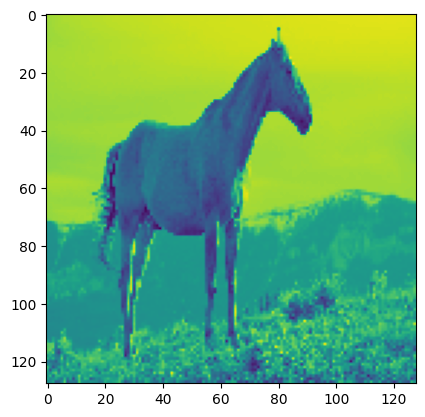

In [10]:
image = X_train[1203,:].reshape((128,128))
plt.imshow(image)
plt.show()

In [11]:
input_shape=img_data[0].shape
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(32,3,3,padding ='same',activation='relu',input_shape = input_shape),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation = 'softmax')
])

In [12]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 43, 43)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 14, 14)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 7, 7)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 7, 7)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               200832    
                                                        

In [14]:
hist = cnn_model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

Epoch 1/100
91/91 [==============================] - 3s 22ms/step - loss: 1.9692 - accuracy: 0.1165 - val_loss: 1.9527 - val_accuracy: 0.1302
Epoch 2/100
91/91 [==============================] - 2s 19ms/step - loss: 1.9656 - accuracy: 0.1297 - val_loss: 1.9516 - val_accuracy: 0.1330
Epoch 3/100
91/91 [==============================] - 2s 19ms/step - loss: 1.9709 - accuracy: 0.1241 - val_loss: 1.9504 - val_accuracy: 0.1330
Epoch 4/100
91/91 [==============================] - 2s 18ms/step - loss: 1.9690 - accuracy: 0.1221 - val_loss: 1.9494 - val_accuracy: 0.1274
Epoch 5/100
91/91 [==============================] - 2s 19ms/step - loss: 1.9664 - accuracy: 0.1221 - val_loss: 1.9484 - val_accuracy: 0.1247
Epoch 6/100
91/91 [==============================] - 2s 19ms/step - loss: 1.9614 - accuracy: 0.1373 - val_loss: 1.9475 - val_accuracy: 0.1247
Epoch 7/100
91/91 [==============================] - 2s 20ms/step - loss: 1.9614 - accuracy: 0.1345 - val_loss: 1.9467 - val_accuracy: 0.1247
Epoch 

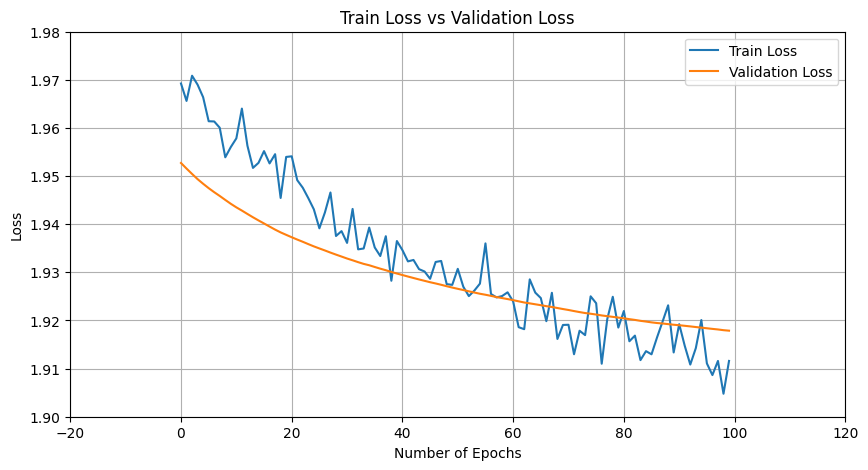

In [15]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])


In [16]:

score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.9178801774978638
Test Accuracy: 0.21052631735801697


In [18]:
test_image = X_test[0:1]
print (test_image.shape)
print(cnn_model.predict(test_image))
# print(cnn_model.predict_class(test_image))
print(y_test[0:1])

(1, 1, 128, 128)
1/1 [==============================] - 0s 32ms/step
[[0.17191635 0.12552743 0.1757859  0.12709817 0.13023534 0.13198733
  0.13744941]]
[[1. 0. 0. 0. 0. 0. 0.]]


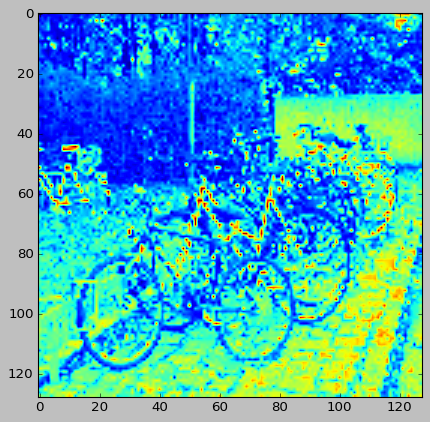

In [19]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()
#even with poor results, prediction is correct